# **HOUSING PRICES ANALYZED**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings('ignore')

# Đọc tập dữ liệu 

In [60]:
data = pd.read_csv('housing-prices-dataset.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [62]:
data.shape

(1460, 81)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [64]:
data.duplicated().any()

False

>> Nhận xét:
>> - Không có dữ liệu trùng

## Kiểm tra tỉ lệ dữ liệu khuyết

In [65]:
ser = data.isnull().sum()
ser = ser[ser>0].sort_values(ascending=False)
n = data.shape[0]
for idx in ser.index:
    print(f'{idx} - {ser[idx]} - {round(ser[idx]/n*100,2)}%')

PoolQC - 1453 - 99.52%
MiscFeature - 1406 - 96.3%
Alley - 1369 - 93.77%
Fence - 1179 - 80.75%
FireplaceQu - 690 - 47.26%
LotFrontage - 259 - 17.74%
GarageType - 81 - 5.55%
GarageYrBlt - 81 - 5.55%
GarageFinish - 81 - 5.55%
GarageQual - 81 - 5.55%
GarageCond - 81 - 5.55%
BsmtExposure - 38 - 2.6%
BsmtFinType2 - 38 - 2.6%
BsmtFinType1 - 37 - 2.53%
BsmtCond - 37 - 2.53%
BsmtQual - 37 - 2.53%
MasVnrArea - 8 - 0.55%
MasVnrType - 8 - 0.55%
Electrical - 1 - 0.07%


# Phân tích EDA

In [66]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Chọn các biến để phân tích

In [67]:

data2 = data[['LotShape','Street','HouseStyle','LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd','SalePrice']]
data2.head()

,LotShape,Street,HouseStyle,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,Reg,Pave,2Story,8450,2003,856,854,2,3,8,208500
1,Reg,Pave,1Story,9600,1976,1262,0,2,3,6,181500
2,IR1,Pave,2Story,11250,2001,920,866,2,3,6,223500
3,IR1,Pave,2Story,9550,1915,961,756,1,3,7,140000
4,IR1,Pave,2Story,14260,2000,1145,1053,2,4,9,250000


In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   Street        1460 non-null   object
 2   HouseStyle    1460 non-null   object
 3   LotArea       1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   2ndFlrSF      1460 non-null   int64 
 7   FullBath      1460 non-null   int64 
 8   BedroomAbvGr  1460 non-null   int64 
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 125.6+ KB


In [69]:
for col in data2.columns:
    print(f'{col} has {data2[col].nunique()} unique values')

LotShape has 4 unique values
Street has 2 unique values
HouseStyle has 8 unique values
LotArea has 1073 unique values
YearBuilt has 112 unique values
1stFlrSF has 753 unique values
2ndFlrSF has 417 unique values
FullBath has 4 unique values
BedroomAbvGr has 8 unique values
TotRmsAbvGrd has 12 unique values
SalePrice has 663 unique values


>>Nhận xét: 
>>- `LotShape`, `Street`, `HouseStyle`, `FullBath`, `BedroomAbvGr`, `TotRmsAbvGrd` sẽ biến đổi thành **`object`**

In [70]:
data2[['LotShape','BedroomAbvGr','TotRmsAbvGrd', 'FullBath']]= data2[['LotShape','BedroomAbvGr','TotRmsAbvGrd','FullBath']].astype('object')

In [71]:
data2['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [72]:
data2['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [73]:
data2['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [74]:
data2['FullBath'].unique()

array([2, 1, 3, 0], dtype=object)

In [75]:
data2['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=object)

In [76]:
data2['TotRmsAbvGrd'].unique()

array([8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14], dtype=object)

### Các biến kiểu object trong data

In [77]:

for col in data2.select_dtypes(include='object').columns: 
    print('*', col, '-',data2[col].nunique(), ':', data2[col].unique().tolist())
print('Số biến:', len(data2.select_dtypes(include='object').columns))  

* LotShape - 4 : ['Reg', 'IR1', 'IR2', 'IR3']
* Street - 2 : ['Pave', 'Grvl']
* HouseStyle - 8 : ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
* FullBath - 4 : [2, 1, 3, 0]
* BedroomAbvGr - 8 : [3, 4, 1, 2, 0, 5, 6, 8]
* TotRmsAbvGrd - 12 : [8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]
Số biến: 6


### Các biến kiểu numeric trong data

In [78]:

for col in data2.select_dtypes(include=['int','float']).columns: 
    print('*', col, '-',data2[col].nunique())
print('Số biến:', len(data2.select_dtypes(include=['int','float']).columns))  

* LotArea - 1073
* YearBuilt - 112
* 1stFlrSF - 753
* 2ndFlrSF - 417
* SalePrice - 663
Số biến: 5


### Chọn ra các biến định tính trong data2

In [79]:

cat_cols = data2.select_dtypes(include='object').columns
cat_cols

Index(['LotShape', 'Street', 'HouseStyle', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd'],
      dtype='object')

### Chọn ra các biến định lượng trong data2

In [80]:
num_cols = data2.select_dtypes(include=['int','float']).columns
num_cols

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'SalePrice'], dtype='object')

### Xác định biến input và output 

In [81]:

X = data2.drop(columns=['SalePrice'])
y = data2['SalePrice']

#### Biến số trong Input

In [82]:

num_X = X.select_dtypes(include=['int','float']).columns
num_X

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF'], dtype='object')

#### Biến phân loại trong Input

In [83]:

cat_X = X.select_dtypes(include='object').columns
cat_X

Index(['LotShape', 'Street', 'HouseStyle', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd'],
      dtype='object')

# Phân tích sơ bộ 

In [84]:
# from ydata_profiling import ProfileReport

In [85]:
# report_data2 = ProfileReport(df = data2, title = 'data2 report')
# report_data2.to_file('data2_report.html')

In [86]:
data2.duplicated().sum() #data có 1 dữ liệu trùng

1

In [87]:
data2.drop_duplicates(keep = 'first', inplace = True)

In [88]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1459 non-null   object
 1   Street        1459 non-null   object
 2   HouseStyle    1459 non-null   object
 3   LotArea       1459 non-null   int64 
 4   YearBuilt     1459 non-null   int64 
 5   1stFlrSF      1459 non-null   int64 
 6   2ndFlrSF      1459 non-null   int64 
 7   FullBath      1459 non-null   object
 8   BedroomAbvGr  1459 non-null   object
 9   TotRmsAbvGrd  1459 non-null   object
 10  SalePrice     1459 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 136.8+ KB


### Phân tích biến số

In [89]:
X[num_X] 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF
0,8450,2003,856,854
1,9600,1976,1262,0
2,11250,2001,920,866
3,9550,1915,961,756
4,14260,2000,1145,1053
...,...,...,...,...
1455,7917,1999,953,694
1456,13175,1978,2073,0
1457,9042,1941,1188,1152
1458,9717,1950,1078,0


#### Phát hiện outliers

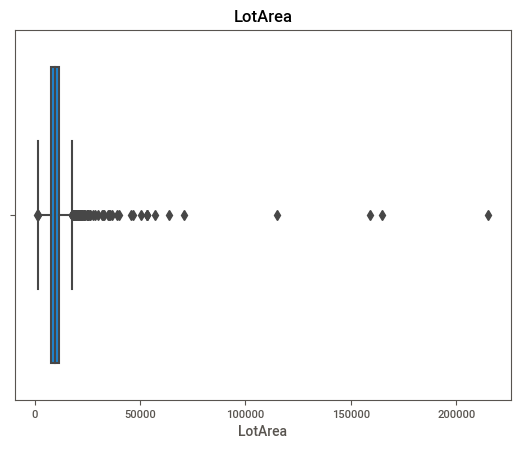

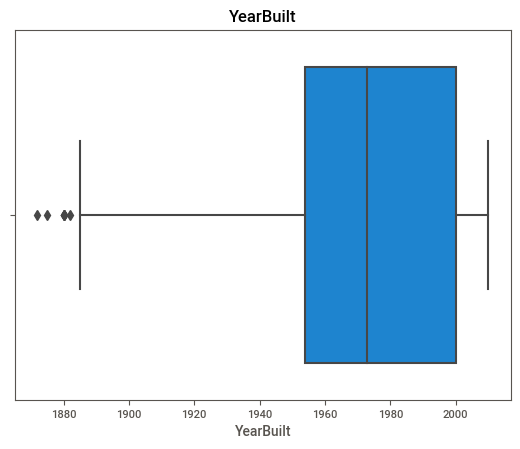

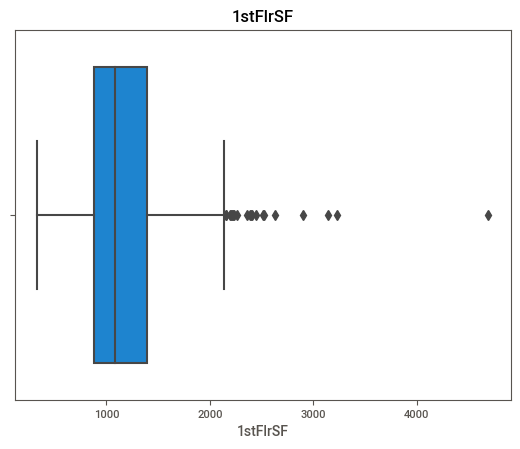

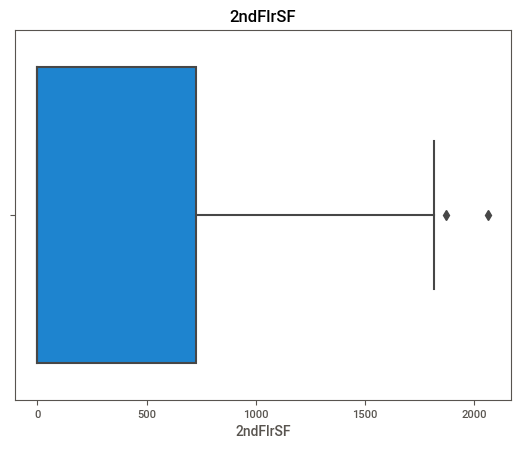

In [90]:
for col in num_X:
    sns.boxplot(data = data2, x = col)
    plt.title(col)
    plt.show()

#### Loại bỏ outliers

In [91]:
def remove_outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.25):
    Q1 = df[column_name].quantile(lower_percentile)
    Q3 = df[column_name].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [92]:
for col in num_X:
    data2 = remove_outliers(data2, col)

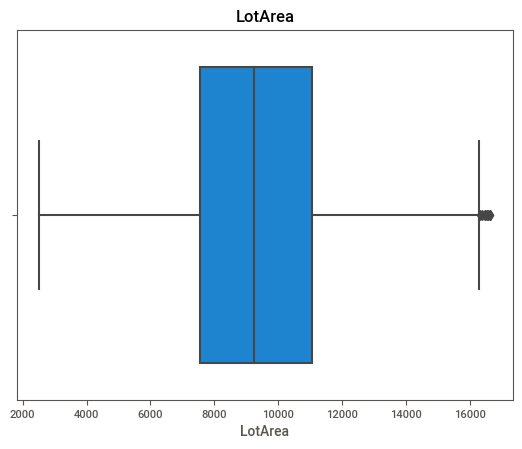

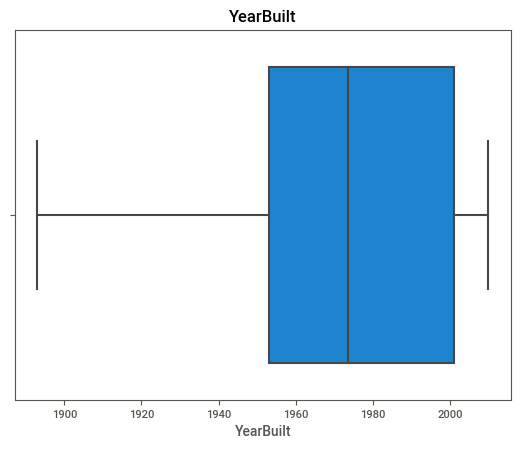

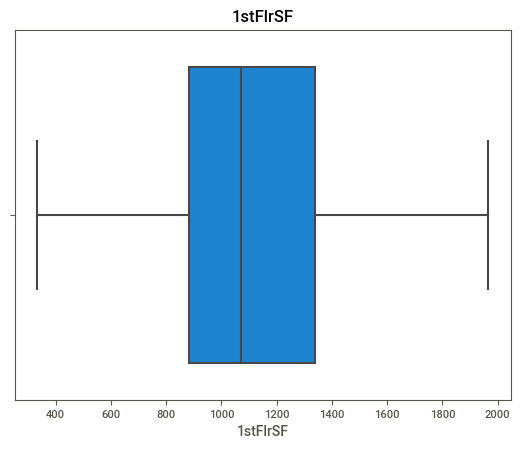

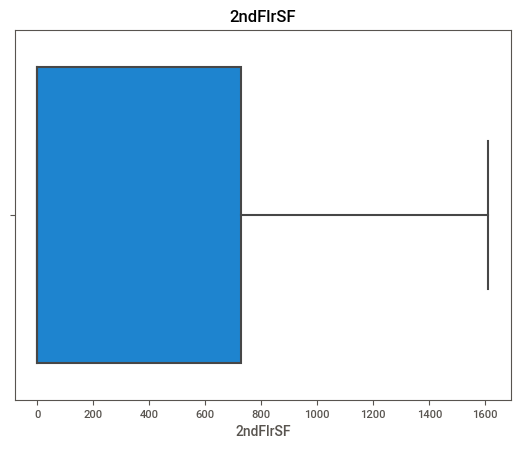

In [93]:
for col in num_X:
    sns.boxplot(data = data2, x = col)
    plt.title(col) 
    plt.show()

### Phân tích đơn biến

In [94]:
data2.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,9289.735614,1971.538880,1127.556765,332.192846,174770.163297
std,2815.784954,29.857242,314.008993,425.466289,67194.185953
min,2522.000000,1893.000000,334.000000,0.000000,34900.000000
25%,7564.250000,1953.000000,884.000000,0.000000,129925.000000
50%,9245.500000,1973.500000,1072.000000,0.000000,160000.000000
75%,11061.250000,2001.000000,1338.750000,727.750000,206225.000000
max,16647.000000,2010.000000,1966.000000,1611.000000,582933.000000


#### Biến số 

--------------------------------------------------
count     1286.000000
mean      9289.735614
std       2815.784954
min       2522.000000
25%       7564.250000
50%       9245.500000
75%      11061.250000
max      16647.000000
Name: LotArea, dtype: float64
<bound method Series.mode of 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1454     7500
1455     7917
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1286, dtype: int64>


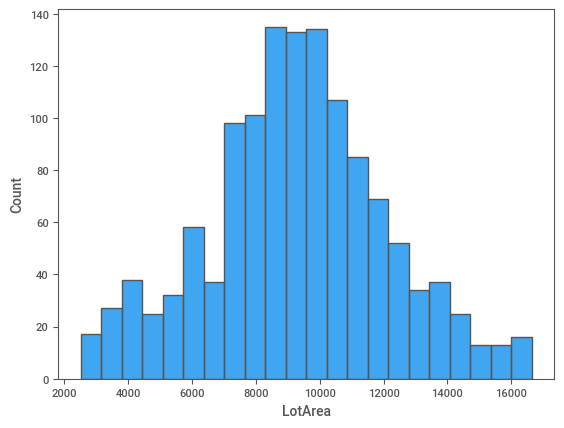

--------------------------------------------------
count    1286.000000
mean     1971.538880
std        29.857242
min      1893.000000
25%      1953.000000
50%      1973.500000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64
<bound method Series.mode of 0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1454    2004
1455    1999
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1286, dtype: int64>


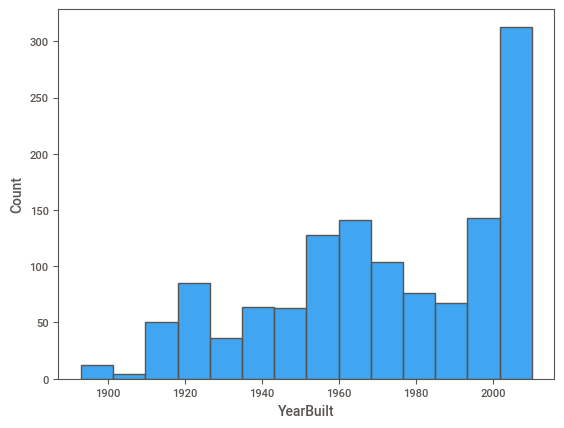

--------------------------------------------------
count    1286.000000
mean     1127.556765
std       314.008993
min       334.000000
25%       884.000000
50%      1072.000000
75%      1338.750000
max      1966.000000
Name: 1stFlrSF, dtype: float64
<bound method Series.mode of 0        856
1       1262
2        920
3        961
4       1145
        ... 
1454    1221
1455     953
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1286, dtype: int64>


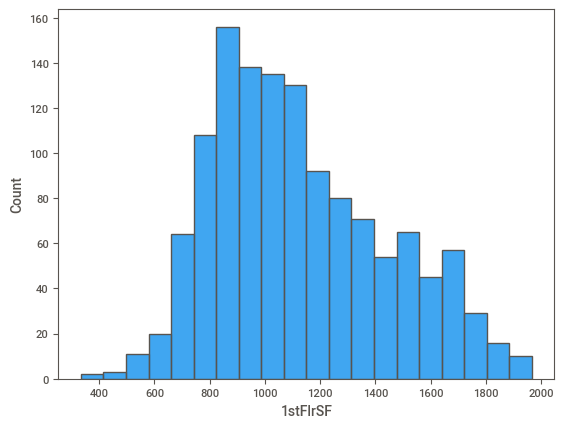

--------------------------------------------------
count    1286.000000
mean      332.192846
std       425.466289
min         0.000000
25%         0.000000
50%         0.000000
75%       727.750000
max      1611.000000
Name: 2ndFlrSF, dtype: float64
<bound method Series.mode of 0        854
1          0
2        866
3        756
4       1053
        ... 
1454       0
1455     694
1457    1152
1458       0
1459       0
Name: 2ndFlrSF, Length: 1286, dtype: int64>


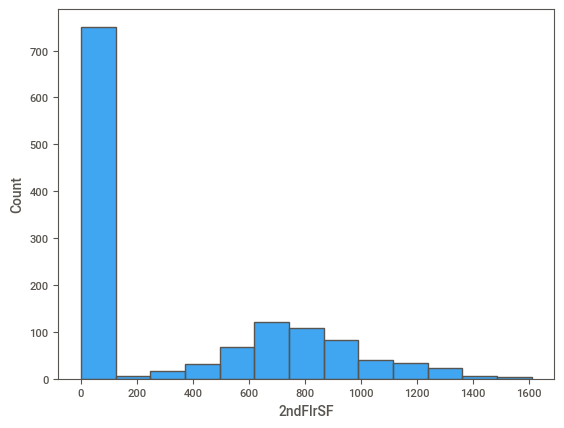

In [95]:
for col in num_X:
    print('-' * 50)
    print(data2[col].describe())
    print(data2[col].mode)
    sns.histplot(data = data2[col])
    plt.show()

>>**Nhận xét:**
>> - `LotArea` tuân theo phân phối chuẩn

#### Biến phân loại 

--------------------------------------------------
Reg    822
IR1    433
IR2     26
IR3      5
Name: LotShape, dtype: int64
-------------------------


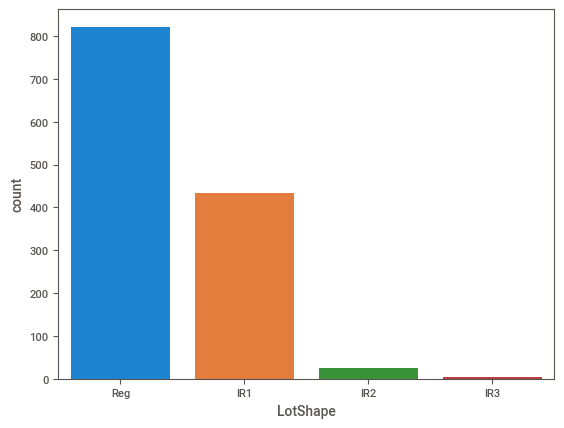

--------------------------------------------------
Pave    1283
Grvl       3
Name: Street, dtype: int64
-------------------------


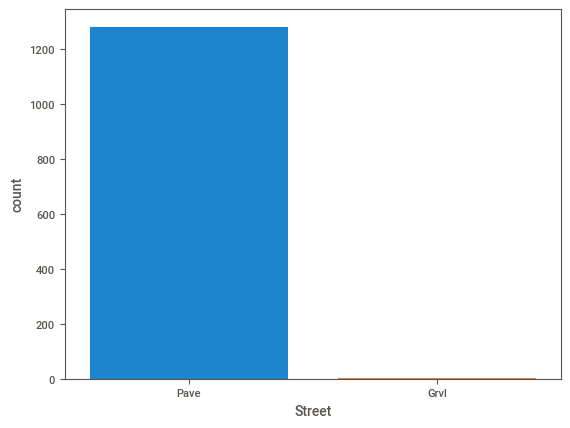

--------------------------------------------------
1Story    655
2Story    370
1.5Fin    140
SLvl       59
SFoyer     31
1.5Unf     14
2.5Unf     11
2.5Fin      6
Name: HouseStyle, dtype: int64
-------------------------


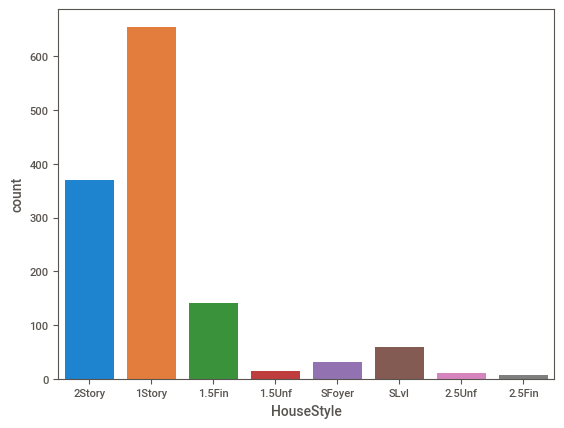

--------------------------------------------------
2    667
1    592
3     20
0      7
Name: FullBath, dtype: int64
-------------------------


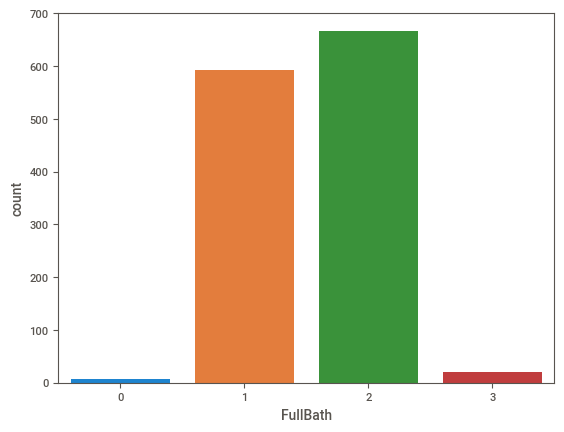

--------------------------------------------------
3    723
2    322
4    171
1     40
5     18
6      7
0      4
8      1
Name: BedroomAbvGr, dtype: int64
-------------------------


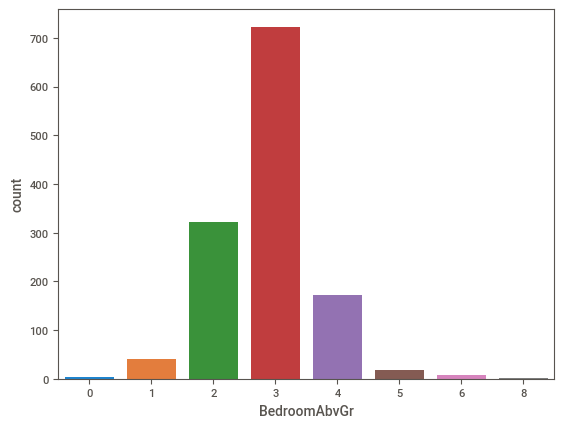

--------------------------------------------------
6     372
7     284
5     254
8     165
4      90
9      57
10     34
11     12
3      11
12      5
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64
-------------------------


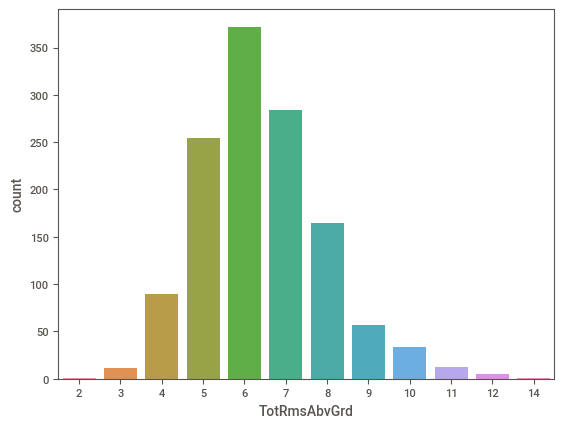

In [96]:
for col in cat_X:
    print('-' * 50)
    sns.countplot(data = data2, x = col)
    print(data2[col].value_counts())
    print('-' * 25)
    plt.show()

### Phân tích 2 biến 

#### Phân tích biến số tác động đến `SalePrice` (biến số tác động lên biến số)

In [97]:
data2.corr().iloc[:, -1]

LotArea      0.380242
YearBuilt    0.610629
1stFlrSF     0.560647
2ndFlrSF     0.360173
SalePrice    1.000000
Name: SalePrice, dtype: float64

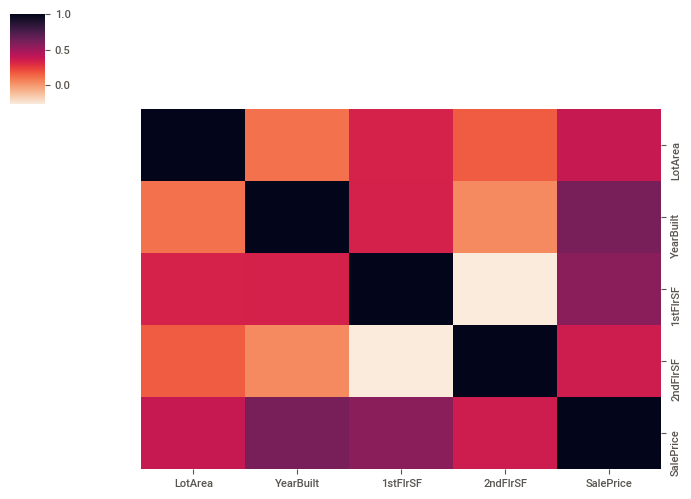

In [98]:
sns.clustermap(data2.corr(), cmap="rocket_r", figsize = (7,5), row_cluster = False, col_cluster = False);

>> Nhận xét:
>> - Tất cả các biến đều có tương quan với `SalePrice` > 0.3 
>> => các biến đều có thể đưa vào phân tích

In [99]:
def analyze_continous_vs_continous(var_1, var_2, df):
    '''
    Calculate Pearson correlation coefficient
    '''
    import scipy.stats as stats
    correlation_coefficient, p_value = stats.pearsonr(df[var_1], df[var_2])
    print('var 1 =',var_1,',','var 2 =',var_2)
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
    print(f"P-value: {p_value:.4f}")    
    sns.regplot(data=df, x=var_1, y=var_2)
    plt.show()

= = = = = = = = = = = = = = = = = = = = 
var 1 = LotArea , var 2 = SalePrice
Pearson Correlation Coefficient: 0.38
P-value: 0.0000


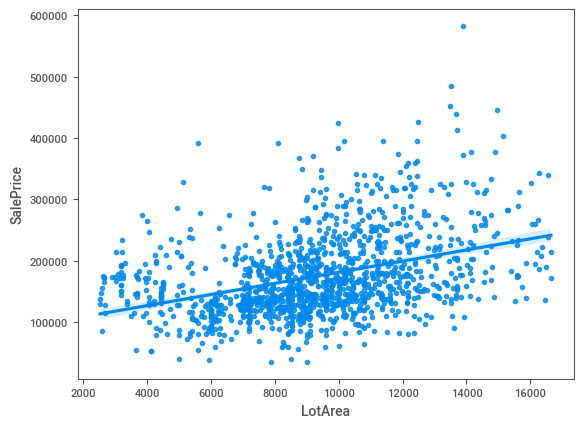

= = = = = = = = = = = = = = = = = = = = 
var 1 = YearBuilt , var 2 = SalePrice
Pearson Correlation Coefficient: 0.61
P-value: 0.0000


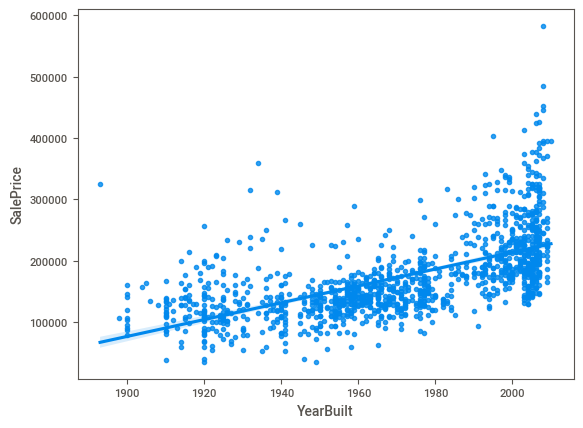

= = = = = = = = = = = = = = = = = = = = 
var 1 = 1stFlrSF , var 2 = SalePrice
Pearson Correlation Coefficient: 0.56
P-value: 0.0000


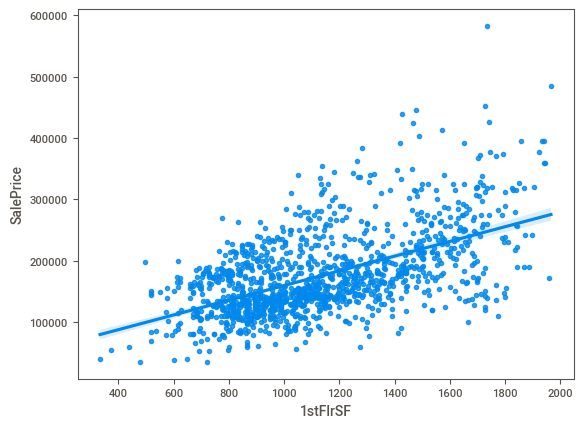

= = = = = = = = = = = = = = = = = = = = 
var 1 = 2ndFlrSF , var 2 = SalePrice
Pearson Correlation Coefficient: 0.36
P-value: 0.0000


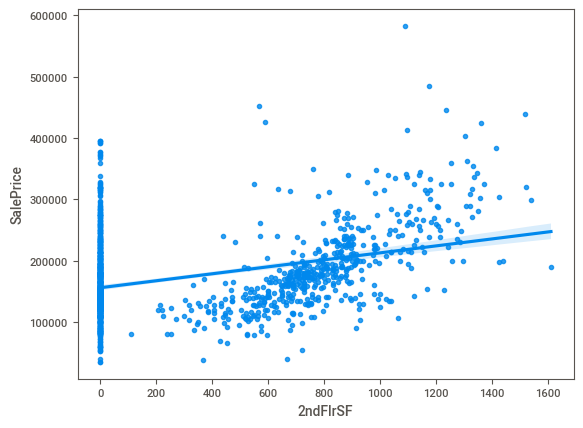

In [100]:
for col in num_X:
        print('= '*20)
        analyze_continous_vs_continous(var_1=col, var_2='SalePrice', df=data2)

>> **Nhận xét**
>> - Các biến số đều có tác động đến `SalePrice` nên được sử dụng để phân tích

#### Phân tích sự tác động của biến phân loại lên biến `SalePrice` (biến phân loại -> biến số)

In [101]:
cat_vs_num = list(cat_X.copy())
cat_vs_num.append('SalePrice')  

>>**Nhận xét**
>> - Có sự khác biệt về giá nhà khi các đặc điểm của ngôi nhà thay đổi 

In [115]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1286 non-null   object
 1   Street        1286 non-null   object
 2   HouseStyle    1286 non-null   object
 3   LotArea       1286 non-null   int64 
 4   YearBuilt     1286 non-null   int64 
 5   1stFlrSF      1286 non-null   int64 
 6   2ndFlrSF      1286 non-null   int64 
 7   FullBath      1286 non-null   object
 8   BedroomAbvGr  1286 non-null   object
 9   TotRmsAbvGrd  1286 non-null   object
 10  SalePrice     1286 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 120.6+ KB


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                     df        sum_sq       mean_sq          F        PR(>F)
LotShape            3.0  7.032607e+11  2.344202e+11  40.190067  5.987260e-25
Street              1.0  1.760400e+10  1.760400e+10   3.018109  8.255131e-02
LotShape:Street     3.0  1.226739e+10  4.089131e+09   0.701059  5.514315e-01
Residual         1453.0  8.475045e+12  5.832791e+09        NaN           NaN


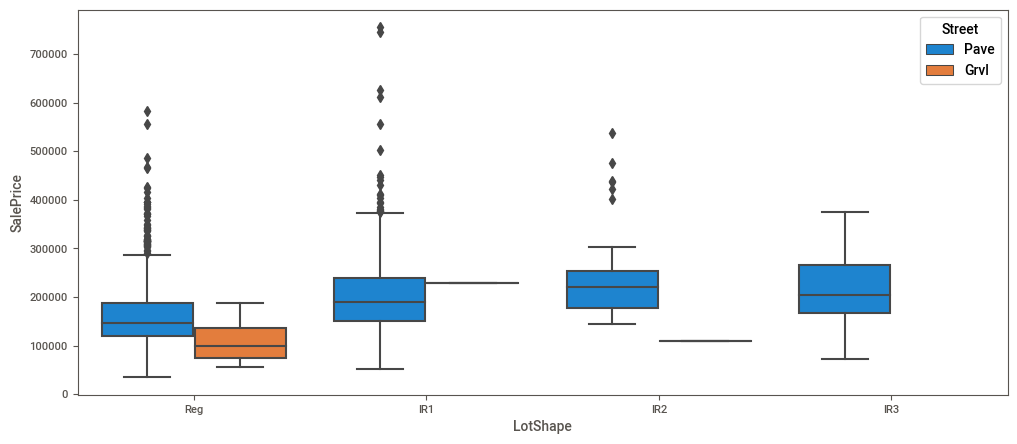

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                         df        sum_sq       mean_sq          F  \
LotShape                3.0  7.032607e+11  2.344202e+11  43.404771   
HouseStyle              7.0  6.355449e+11  9.079213e+10  16.810884   
LotShape:HouseStyle    21.0  1.896756e+11  9.032173e+09   1.672379   
Residual             1438.0  7.766343e+12  5.400795e+09        NaN   

                           PR(>F)  
LotShape             7.518181e-27  
HouseStyle           1.892517e-21  
LotShape:HouseStyle  2.876455e-02  
Residual                      NaN  


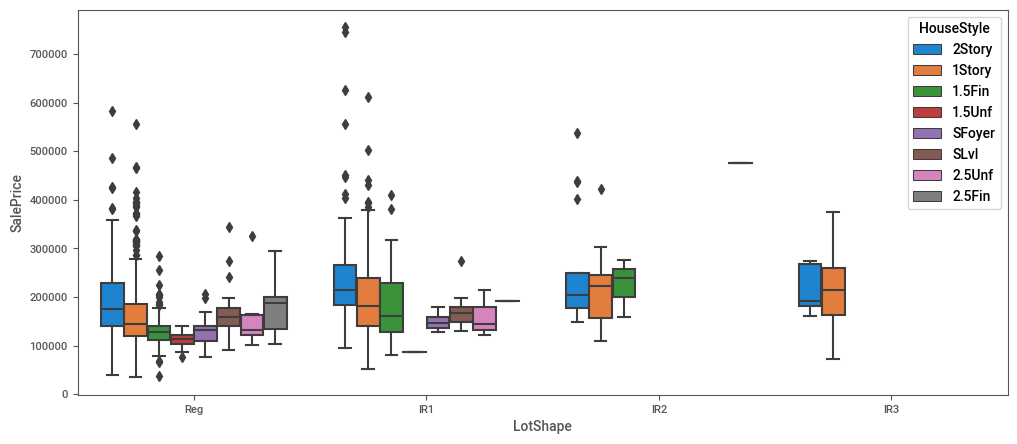

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       df        sum_sq       mean_sq           F  \
LotShape              3.0  7.032607e+11  2.344202e+11   56.755070   
FullBath              1.0  2.481978e+12  2.481978e+12  600.907384   
LotShape:FullBath     3.0  2.535418e+10  8.451392e+09    2.046151   
Residual           1452.0  5.997318e+12  4.130384e+09         NaN   

                          PR(>F)  
LotShape            1.085106e-34  
FullBath           2.480587e-111  
LotShape:FullBath   1.055635e-01  
Residual                     NaN  


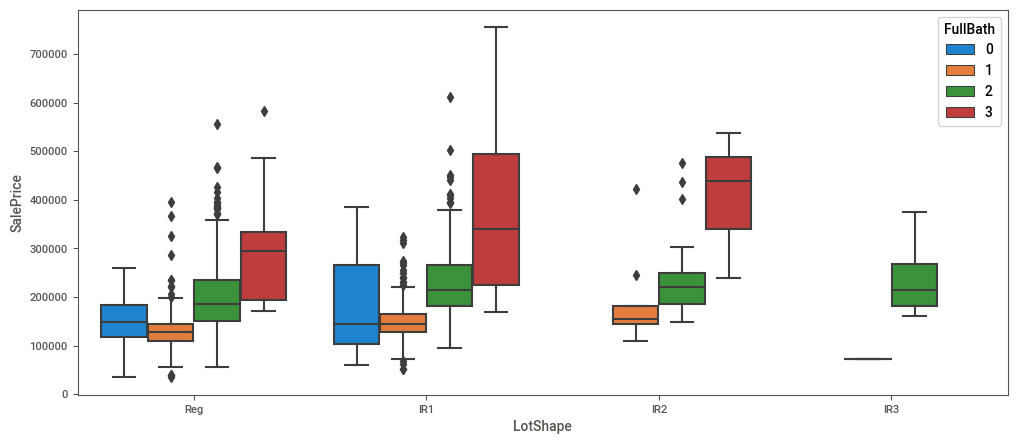

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                           df        sum_sq       mean_sq          F  \
LotShape                  3.0  7.032607e+11  2.344202e+11  41.126417   
BedroomAbvGr              1.0  2.142386e+11  2.142386e+11  37.585767   
LotShape:BedroomAbvGr     3.0  1.402356e+10  4.674520e+09   0.820092   
Residual               1452.0  8.276388e+12  5.699992e+09        NaN   

                             PR(>F)  
LotShape               1.658499e-25  
BedroomAbvGr           1.125240e-09  
LotShape:BedroomAbvGr  4.827388e-01  
Residual                        NaN  


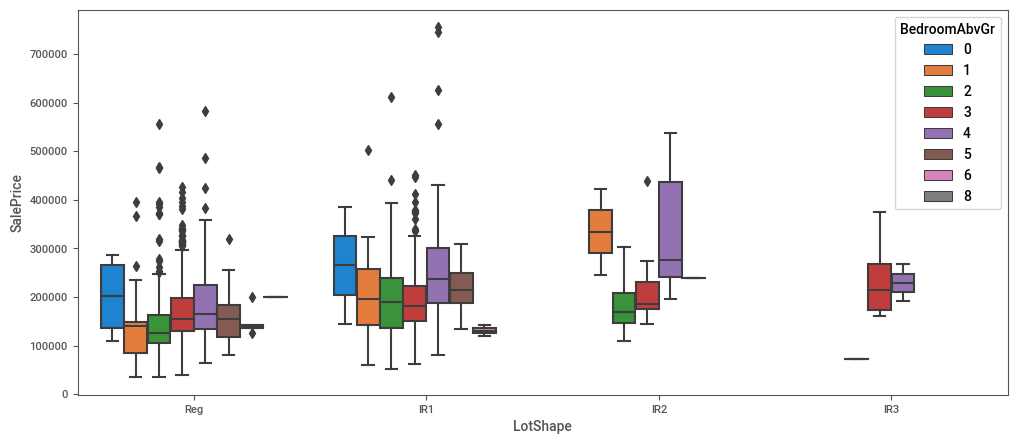

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                           df        sum_sq       mean_sq           F  \
LotShape                  3.0  7.032607e+11  2.344202e+11   55.635604   
TotRmsAbvGrd              1.0  2.316952e+12  2.316952e+12  549.888695   
LotShape:TotRmsAbvGrd     3.0  6.970587e+10  2.323529e+10    5.514495   
Residual               1452.0  6.117992e+12  4.213493e+09         NaN   

                              PR(>F)  
LotShape                4.842273e-34  
TotRmsAbvGrd           2.203210e-103  
LotShape:TotRmsAbvGrd   9.143864e-04  
Residual                         NaN  


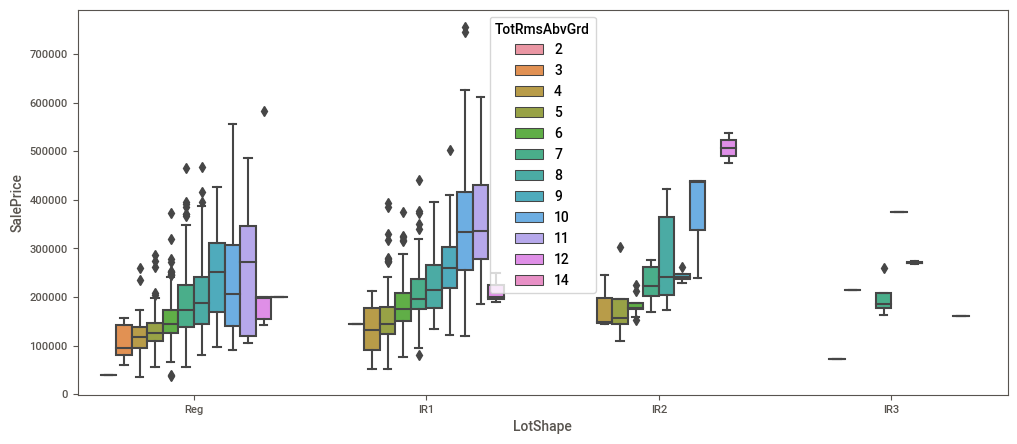

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       df        sum_sq       mean_sq          F        PR(>F)
Street                1.0  1.550534e+10  1.550534e+10   2.666856  1.026755e-01
HouseStyle            7.0  7.860494e+11  1.122928e+11  19.313900  8.079050e-25
Street:HouseStyle     7.0  3.791459e+10  5.416370e+09   0.931594  4.807546e-01
Residual           1449.0  8.424618e+12  5.814091e+09        NaN           NaN


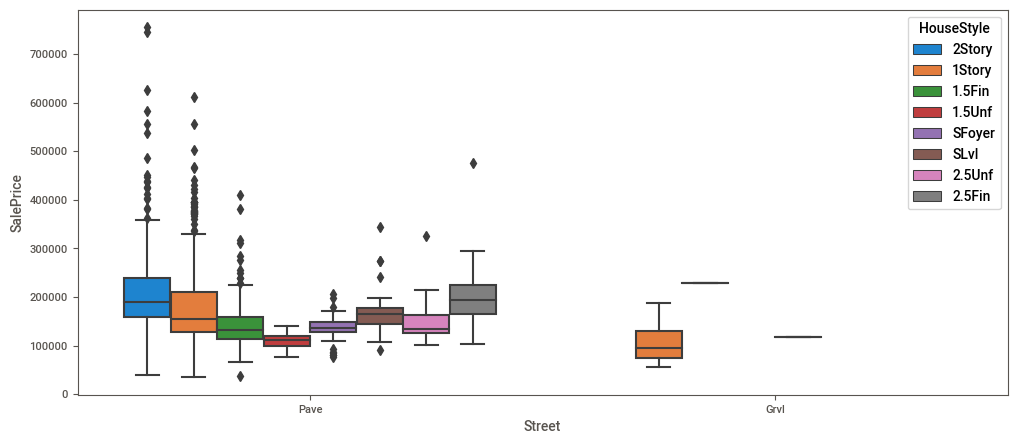

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                     df        sum_sq       mean_sq           F         PR(>F)
Street              1.0  1.550534e+10  1.550534e+10    3.577665   5.875974e-02
FullBath            1.0  2.881016e+12  2.881016e+12  664.758622  4.649495e-121
Street:FullBath     1.0  1.190669e+09  1.190669e+09    0.274732   6.002548e-01
Residual         1456.0  6.310199e+12  4.333928e+09         NaN            NaN


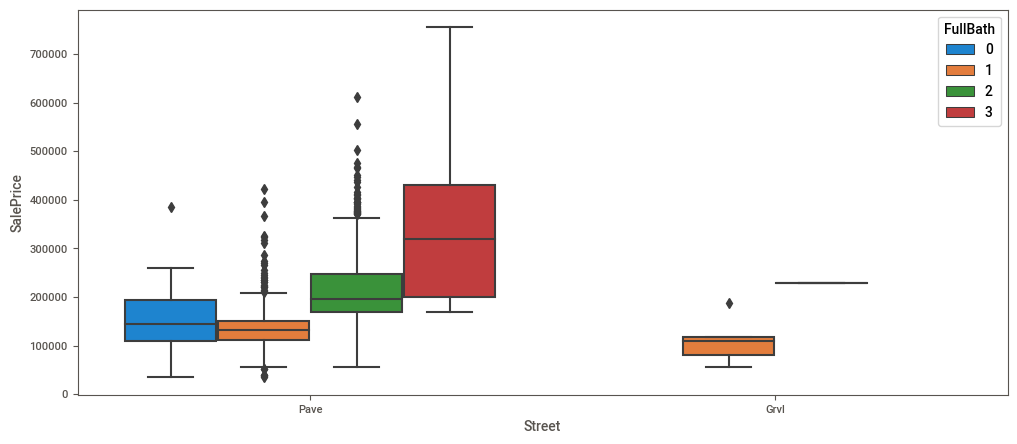

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                         df        sum_sq       mean_sq          F  \
Street                  1.0  1.550534e+10  1.550534e+10   2.529265   
BedroomAbvGr            1.0  2.571018e+11  2.571018e+11  41.939015   
Street:BedroomAbvGr     1.0  9.480674e+09  9.480674e+09   1.546508   
Residual             1456.0  8.925824e+12  6.130373e+09        NaN   

                           PR(>F)  
Street               1.119693e-01  
BedroomAbvGr         1.284360e-10  
Street:BedroomAbvGr  2.138518e-01  
Residual                      NaN  


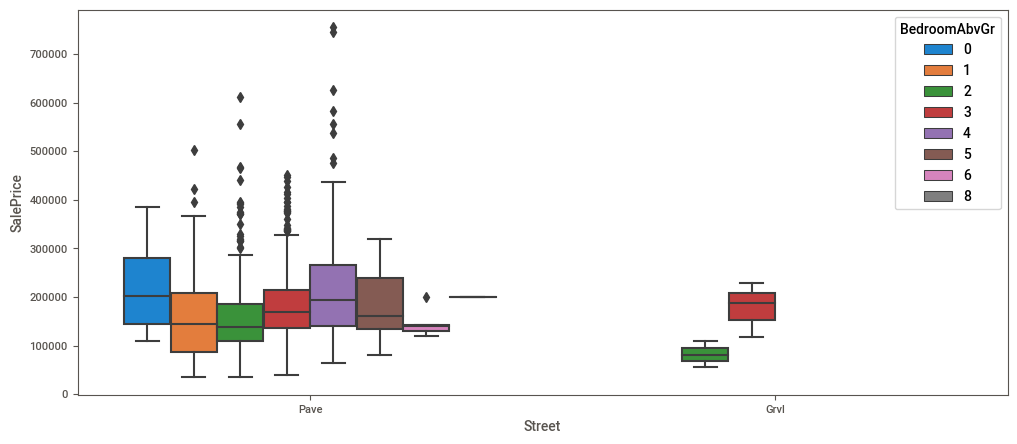

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                         df        sum_sq       mean_sq           F  \
Street                  1.0  1.550534e+10  1.550534e+10    3.430315   
TotRmsAbvGrd            1.0  2.609839e+12  2.609839e+12  577.386141   
Street:TotRmsAbvGrd     1.0  1.312123e+09  1.312123e+09    0.290287   
Residual             1456.0  6.581255e+12  4.520093e+09         NaN   

                            PR(>F)  
Street                6.421219e-02  
TotRmsAbvGrd         9.779960e-108  
Street:TotRmsAbvGrd   5.901192e-01  
Residual                       NaN  


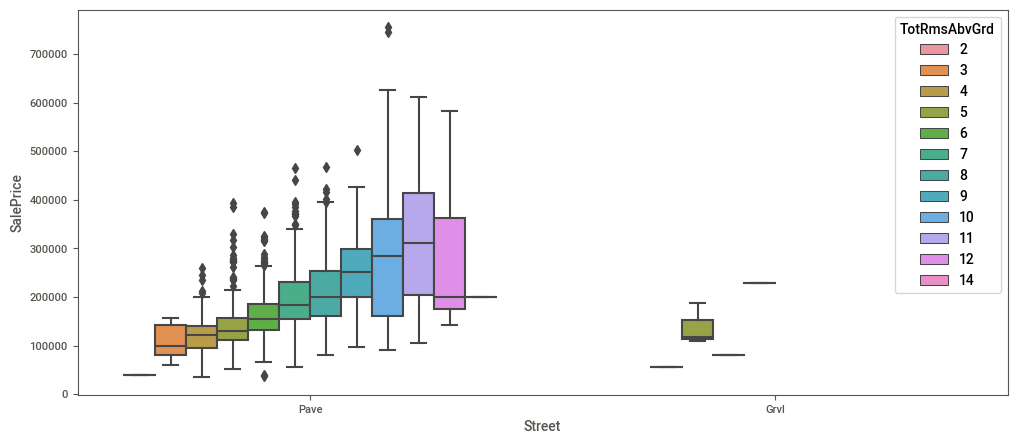

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       df        sum_sq       mean_sq          F        PR(>F)
HouseStyle            7.0  7.947590e+11  1.135370e+11  19.615041  3.192025e-25
Street                1.0  6.795767e+09  6.795767e+09   1.174060  2.787489e-01
HouseStyle:Street     7.0  2.595018e+10  3.707169e+09   0.640463  7.226385e-01
Residual           1449.0  8.387192e+12  5.788262e+09        NaN           NaN


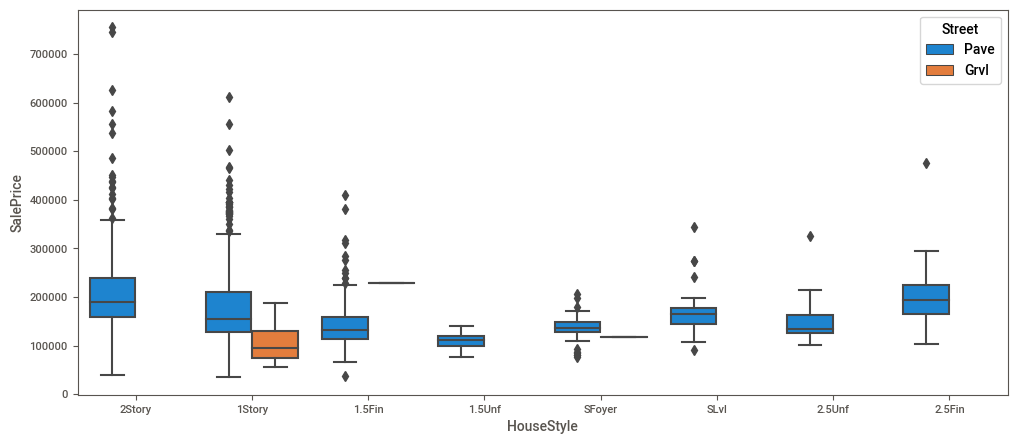

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                         df        sum_sq       mean_sq           F  \
HouseStyle              7.0  7.947590e+11  1.135370e+11   27.465128   
FullBath                1.0  2.229727e+12  2.229727e+12  539.381399   
HouseStyle:FullBath     7.0  2.129109e+11  3.041585e+10    7.357735   
Residual             1445.0  5.973428e+12  4.133860e+09         NaN   

                            PR(>F)  
HouseStyle            1.315715e-35  
FullBath             1.186713e-101  
HouseStyle:FullBath   1.054935e-08  
Residual                       NaN  


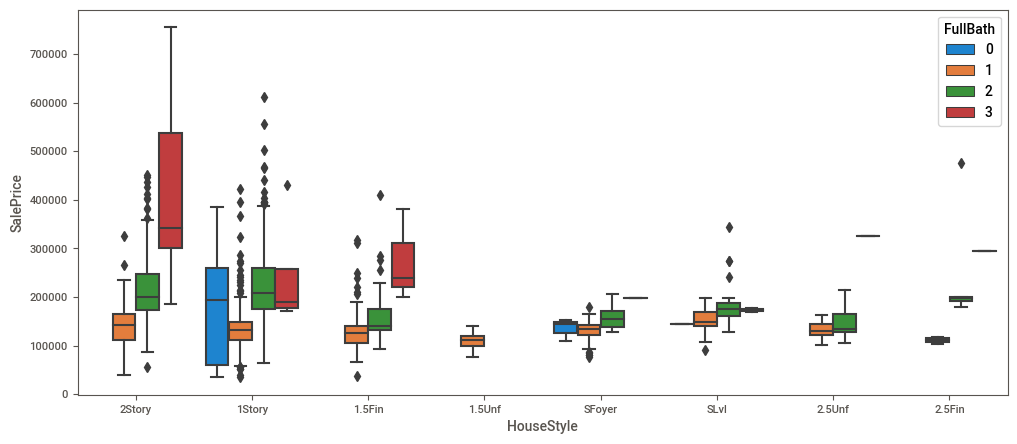

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                             df        sum_sq       mean_sq          F  \
HouseStyle                  7.0  7.947590e+11  1.135370e+11  20.117870   
BedroomAbvGr                1.0  8.553221e+10  8.553221e+10  15.155638   
HouseStyle:BedroomAbvGr     7.0  1.782766e+11  2.546808e+10   4.512745   
Residual                 1444.0  8.149344e+12  5.643590e+09        NaN   

                               PR(>F)  
HouseStyle               6.848239e-26  
BedroomAbvGr             1.035176e-04  
HouseStyle:BedroomAbvGr  5.467014e-05  
Residual                          NaN  


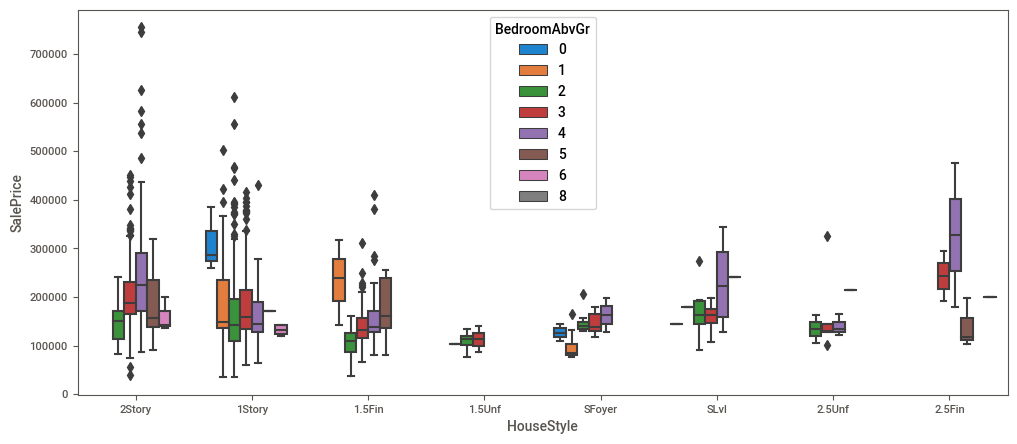

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                             df        sum_sq       mean_sq           F  \
HouseStyle                  7.0  7.947590e+11  1.135370e+11   27.457672   
TotRmsAbvGrd                1.0  2.329940e+12  2.329940e+12  563.470239   
HouseStyle:TotRmsAbvGrd     7.0  1.122972e+11  1.604246e+10    3.879691   
Residual                 1444.0  5.970915e+12  4.134983e+09         NaN   

                                PR(>F)  
HouseStyle                1.350354e-35  
TotRmsAbvGrd             1.959098e-105  
HouseStyle:TotRmsAbvGrd   3.399613e-04  
Residual                           NaN  


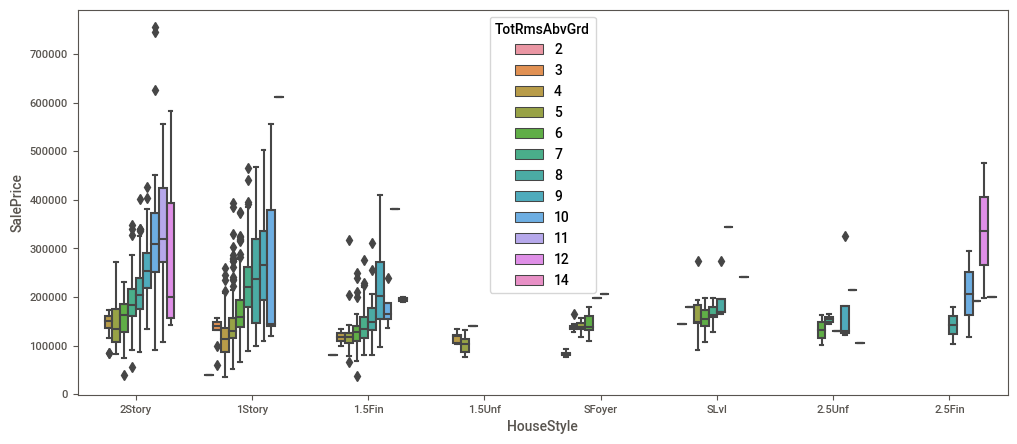

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                     df        sum_sq       mean_sq           F         PR(>F)
Street              1.0  1.550534e+10  1.550534e+10    3.577665   5.875974e-02
FullBath            1.0  2.881016e+12  2.881016e+12  664.758622  4.649495e-121
FullBath:Street     1.0  1.190669e+09  1.190669e+09    0.274732   6.002548e-01
Residual         1456.0  6.310199e+12  4.333928e+09         NaN            NaN


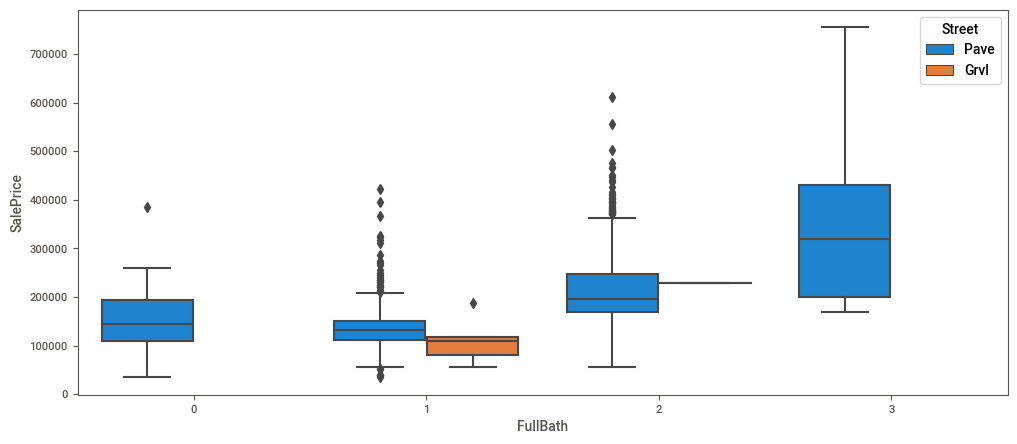

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                         df        sum_sq       mean_sq           F  \
HouseStyle              7.0  7.947590e+11  1.135370e+11   27.465128   
FullBath                1.0  2.229727e+12  2.229727e+12  539.381399   
FullBath:HouseStyle     7.0  2.129109e+11  3.041585e+10    7.357735   
Residual             1445.0  5.973428e+12  4.133860e+09         NaN   

                            PR(>F)  
HouseStyle            1.315715e-35  
FullBath             1.186713e-101  
FullBath:HouseStyle   1.054935e-08  
Residual                       NaN  


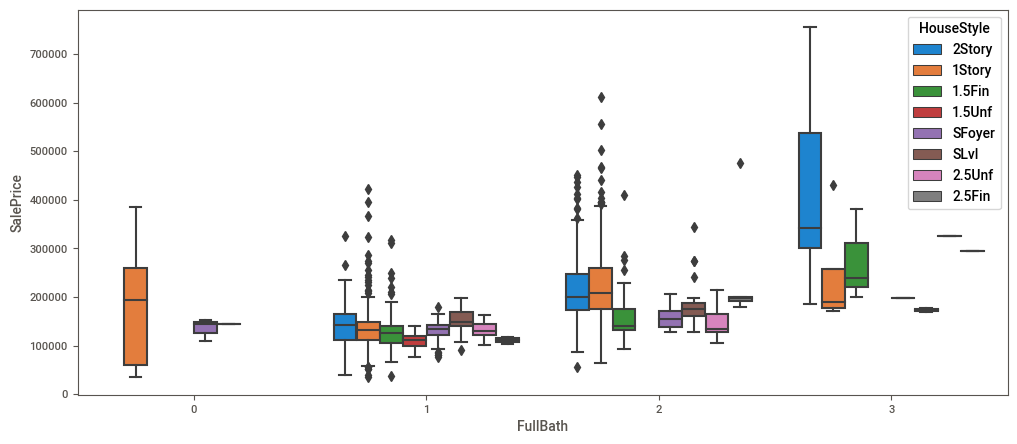

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                           df        sum_sq       mean_sq           F  \
FullBath                  1.0  2.894450e+12  2.894450e+12  674.973626   
BedroomAbvGr              1.0  1.332991e+10  1.332991e+10    3.108478   
FullBath:BedroomAbvGr     1.0  5.645053e+10  5.645053e+10   13.164027   
Residual               1456.0  6.243681e+12  4.288242e+09         NaN   

                              PR(>F)  
FullBath               1.399371e-122  
BedroomAbvGr            7.809547e-02  
FullBath:BedroomAbvGr   2.952363e-04  
Residual                         NaN  


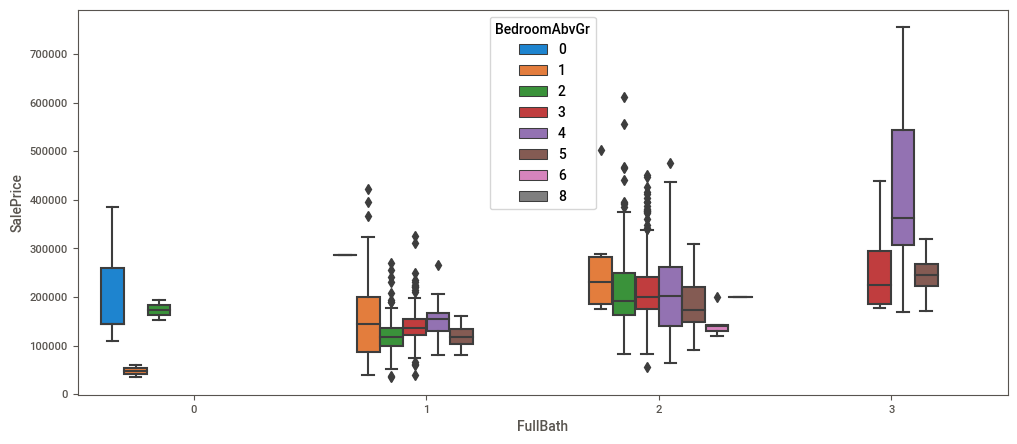

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                           df        sum_sq       mean_sq           F  \
FullBath                  1.0  2.894450e+12  2.894450e+12  760.603574   
TotRmsAbvGrd              1.0  6.595781e+11  6.595781e+11  173.323919   
FullBath:TotRmsAbvGrd     1.0  1.131257e+11  1.131257e+11   29.727169   
Residual               1456.0  5.540757e+12  3.805465e+09         NaN   

                              PR(>F)  
FullBath               4.705189e-135  
TotRmsAbvGrd            1.755746e-37  
FullBath:TotRmsAbvGrd   5.834294e-08  
Residual                         NaN  


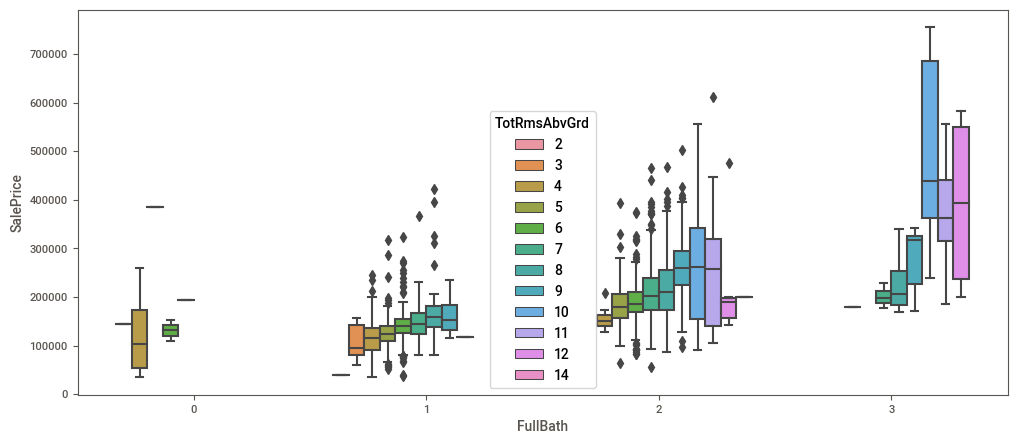

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                         df        sum_sq       mean_sq          F  \
Street                  1.0  1.550534e+10  1.550534e+10   2.529265   
BedroomAbvGr            1.0  2.571018e+11  2.571018e+11  41.939015   
BedroomAbvGr:Street     1.0  9.480674e+09  9.480674e+09   1.546508   
Residual             1456.0  8.925824e+12  6.130373e+09        NaN   

                           PR(>F)  
Street               1.119693e-01  
BedroomAbvGr         1.284360e-10  
BedroomAbvGr:Street  2.138518e-01  
Residual                      NaN  


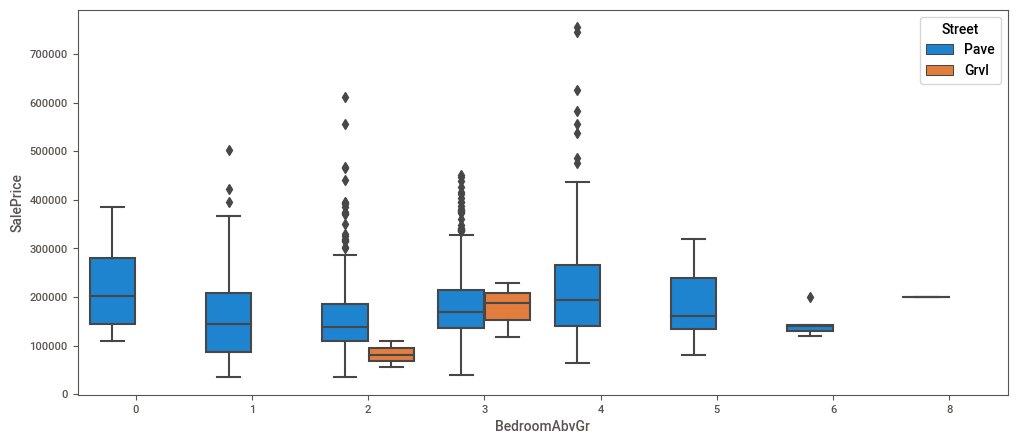

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                             df        sum_sq       mean_sq          F  \
HouseStyle                  7.0  7.947590e+11  1.135370e+11  20.117870   
BedroomAbvGr                1.0  8.553221e+10  8.553221e+10  15.155638   
BedroomAbvGr:HouseStyle     7.0  1.782766e+11  2.546808e+10   4.512745   
Residual                 1444.0  8.149344e+12  5.643590e+09        NaN   

                               PR(>F)  
HouseStyle               6.848239e-26  
BedroomAbvGr             1.035176e-04  
BedroomAbvGr:HouseStyle  5.467014e-05  
Residual                          NaN  


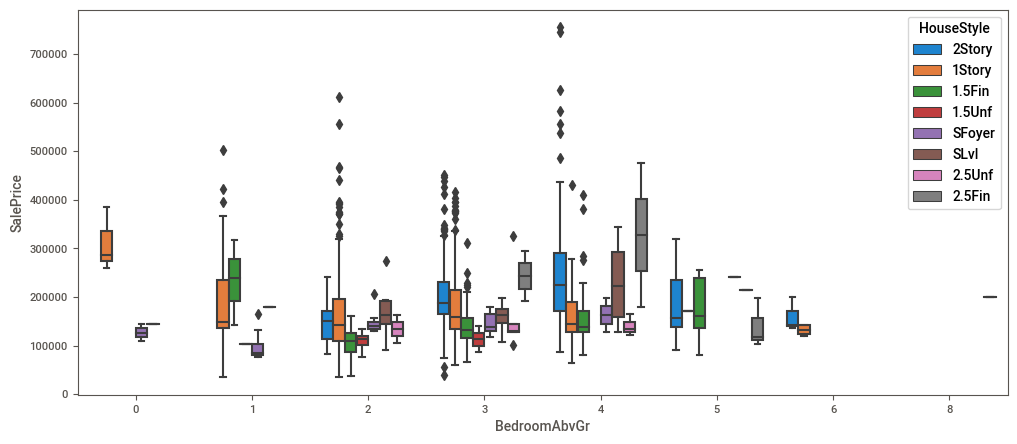

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                           df        sum_sq       mean_sq           F  \
BedroomAbvGr              1.0  2.605440e+11  2.605440e+11   60.757758   
FullBath                  1.0  2.647236e+12  2.647236e+12  617.324346   
BedroomAbvGr:FullBath     1.0  5.645053e+10  5.645053e+10   13.164027   
Residual               1456.0  6.243681e+12  4.288242e+09         NaN   

                              PR(>F)  
BedroomAbvGr            1.220519e-14  
FullBath               6.766855e-114  
BedroomAbvGr:FullBath   2.952363e-04  
Residual                         NaN  


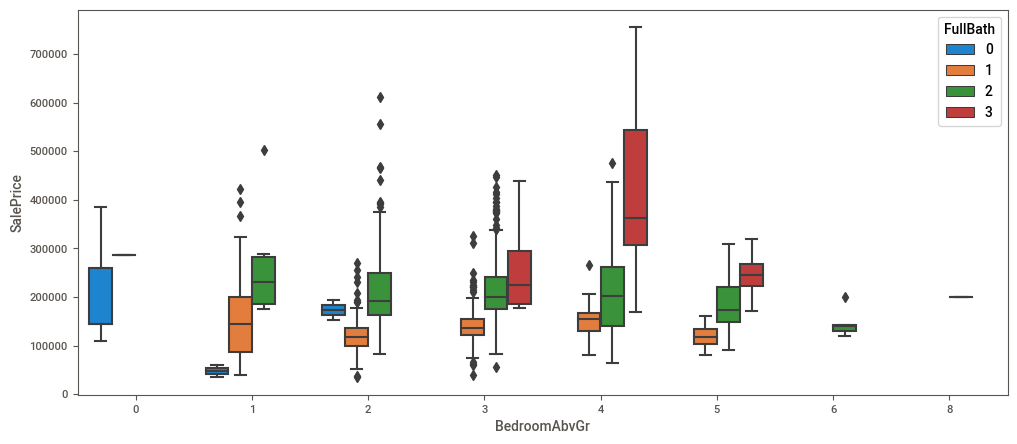

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                               df        sum_sq       mean_sq           F  \
BedroomAbvGr                  1.0  2.605440e+11  2.605440e+11   64.089382   
TotRmsAbvGrd                  1.0  2.994464e+12  2.994464e+12  736.587059   
BedroomAbvGr:TotRmsAbvGrd     1.0  3.379489e+10  3.379489e+10    8.312966   
Residual                   1456.0  5.919109e+12  4.065322e+09         NaN   

                                  PR(>F)  
BedroomAbvGr                2.410249e-15  
TotRmsAbvGrd               1.322699e-131  
BedroomAbvGr:TotRmsAbvGrd   3.994133e-03  
Residual                             NaN  


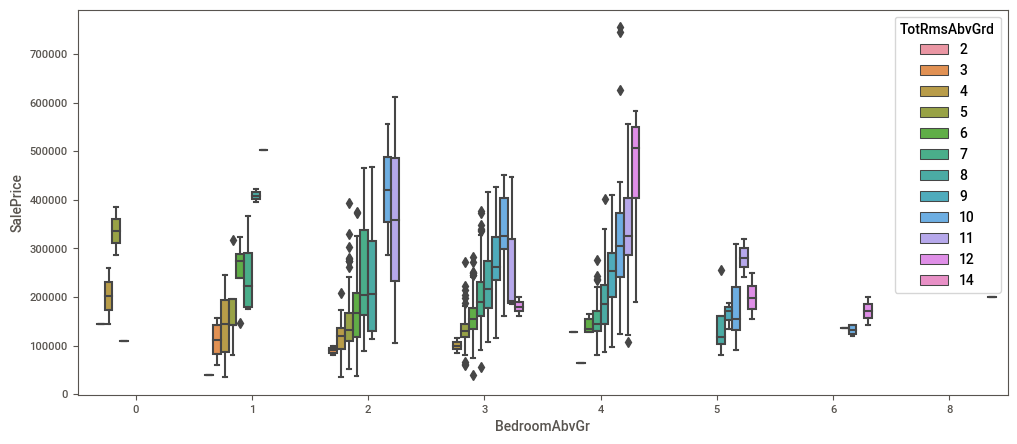

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [103]:
for idx_0 in cat_X[:-1]:
    for idx_1 in cat_X[1:]:
        if idx_0 != idx_1:
            print('= ' * 50)
            model = ols(f'SalePrice ~ {idx_0} + {idx_1} + {idx_0}:{idx_1}', data= data[cat_vs_num]).fit()
            anova_table = sm.stats.anova_lm(model)
            print(anova_table)
            plt.figure(figsize = (12, 5))
            sns.boxplot(data = data[cat_vs_num], x = idx_0, y = 'SalePrice', hue = idx_1)
            plt.show()
            print('= ' * 50)



### Xây dựng mô hình 

In [104]:
X1 = data2.drop(columns=['SalePrice'])
y1 = data2['SalePrice']

In [105]:
for col in cat_X:
    dummies = pd.get_dummies(data2[col], prefix=col, dtype=int, drop_first=True)
    X1 = pd.concat([X1,dummies],axis=1)
    X1.drop(col, axis=1, inplace=True)

In [106]:
X1.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,HouseStyle_1.5Unf,HouseStyle_1Story,...,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14
0,8450,2003,856,854,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9600,1976,1262,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,11250,2001,920,866,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,9550,1915,961,756,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,14260,2000,1145,1053,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1[num_X] = scaler.fit_transform(X1[num_X])

In [108]:


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = model.predict(X_test)

In [110]:
print('The train MSE:', mean_squared_error(y_train, model.predict(X_train)))
print('The test MSE:', mean_squared_error(y_test, y_pred))
print('The train MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('The test MAE:', mean_absolute_error(y_test, y_pred))

The train MSE: 980596027.7296214
The test MSE: 901934923.8296899
The train MAE: 23029.58536765692
The test MAE: 21511.095758571966


In [111]:
print('R^2 of test:', model.score(X_test, y_test))
print('R^2 of train:', model.score(X_train, y_train))
print('R^2 of full:', model.score(X1, y1))

R^2 of test: 0.7965945843474918
R^2 of train: 0.7835744855396621
R^2 of full: 0.7861454785327813


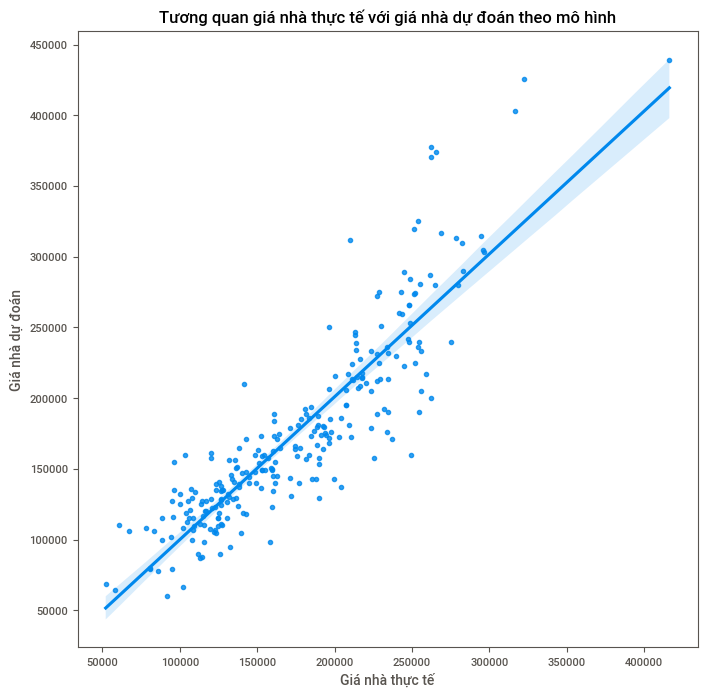

In [112]:
plt.figure(figsize=(8,8))
sns.regplot(x = y_pred, y = y_test)
plt.xlabel('Giá nhà thực tế')
plt.ylabel('Giá nhà dự đoán')
# plt.plot([100000, 300000], [10000, 300000], '-', color = 'r')
plt.title('Tương quan giá nhà thực tế với giá nhà dự đoán theo mô hình')
plt.show()

>> **Nhận xét**
>> - $R^{2}$ = 79.6% là tương đối tốt, tuy nhiên, ở một số điểm dữ liệu có sai số khá lớn, vì vậy, mô hình hiện tại chưa thực sự tốt => chọn lại biến phù hợp hơn

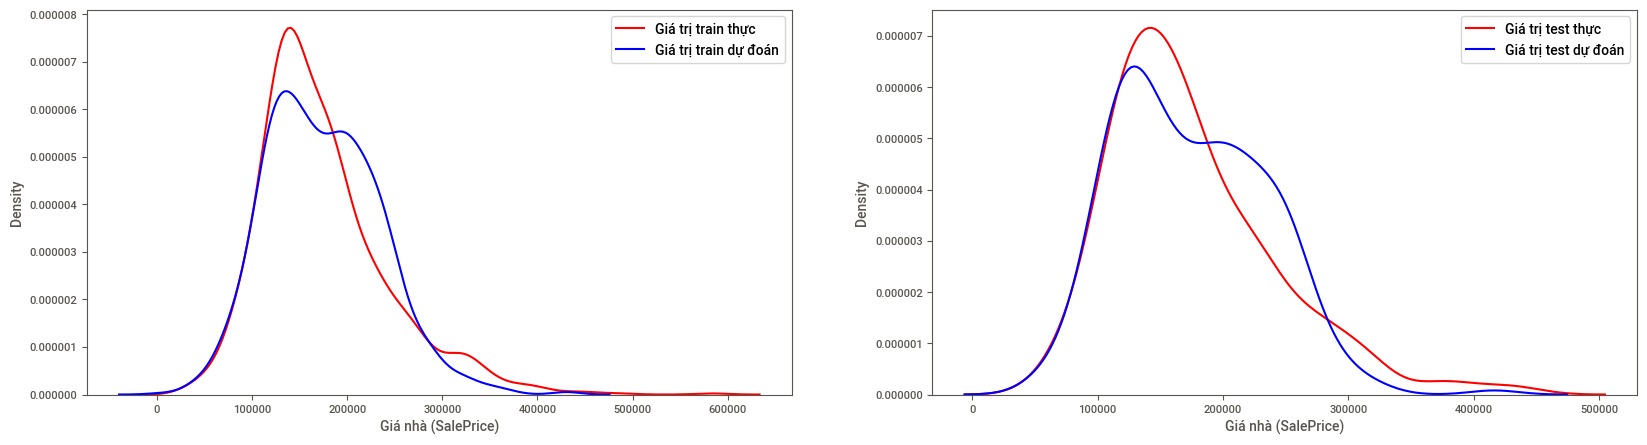

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Giá trị train thực")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Giá trị train dự đoán", ax=ax1)
plt.xlabel('Giá nhà (SalePrice)')
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Giá trị test thực")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Giá trị test dự đoán" , ax=ax2)
plt.xlabel('Giá nhà (SalePrice)')
plt.legend()
plt.show()

### Cải thiện hiệu suất mô hình 

In [114]:
import sweetviz as sv
my_report = sv.analyze(data2)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [131]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
XskB = data.drop(columns='SalePrice')
yskB = data['SalePrice']

In [117]:
num_cols_full = XskB.select_dtypes(include=['int','float']).columns
num_cols_full

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [118]:
XskB = XskB[num_cols_full]
# Số lượng và tỉ lệ % các giá trị null
ser = XskB.isnull().sum()
ser = ser[ser>0].sort_values(ascending=False)
n = XskB.shape[0]
for idx in ser.index:
    print(f'{idx} - {ser[idx]} - {round(ser[idx]/n*100,2)}%')

LotFrontage - 259 - 17.74%
GarageYrBlt - 81 - 5.55%
MasVnrArea - 8 - 0.55%


In [119]:
# Do tỉ lệ phần trăm các dữ liệu bị null không nhiều, ta thay bằng giá trị trung bình cho các cột có dữ liệu bị null
for column in XskB.columns:
    if XskB[column].isnull().any():
        mean = XskB[column].mean()
        XskB[column].fillna(mean, inplace=True)

In [121]:
best_features = SelectKBest(score_func=f_regression, k='all')
best_features.fit(XskB, yskB)

SelectKBest(k='all', score_func=<function f_regression at 0x17187c9d0>)

In [122]:
scores = pd.DataFrame(best_features.scores_)
columns = pd.DataFrame(num_cols_full)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
top10 = feature_scores['Feature'][:10].tolist()
top10

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [123]:
data_new = pd.concat([data[top10], data['SalePrice']], axis=1)

#Xóa outlier
for col in top10:
    data_new = remove_outliers(data_new, col)

#Chia X, y
X_new = data_new[top10]
y_new = data_new['SalePrice']

#StandardScaler:
X_new[top10] = scaler.fit_transform(X_new[top10])
X_new.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.860066,0.778499,0.460456,0.558581,-0.532235,-0.780955,0.952847,1.412522,1.093239,0.904484
1,0.017078,-0.378397,0.460456,0.082586,0.771227,0.562673,0.952847,-0.153563,0.156659,-0.408214
2,0.860066,0.974758,0.460456,0.883123,-0.326763,-0.569152,0.952847,-0.153563,1.023863,0.855866
3,0.860066,0.796575,1.921130,1.067030,-0.853285,-0.433465,-0.962158,0.629480,-1.959319,-0.699924
4,1.703053,2.038689,1.921130,2.116381,0.395599,0.175469,0.952847,2.195564,0.989175,0.758629


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)

In [125]:
model.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = model.predict(X_test)

In [127]:
# Đánh giá lại:
print('The full R-square is:', model.score(X_new,y_new))
print('The train R-square is:', model.score(X_train,y_train))
print('The test R-square is:', model.score(X_test,y_test))

The full R-square is: 0.8084766262621179
The train R-square is: 0.8036184523055668
The test R-square is: 0.8204361952168014


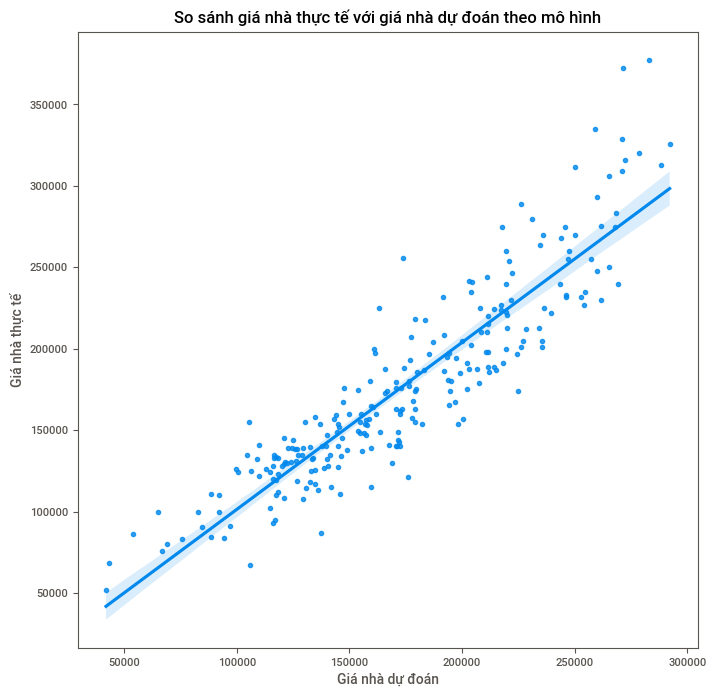

In [130]:
plt.figure(figsize=(8,8))
sns.regplot(x = y_pred, y = y_test)
plt.xlabel('Giá nhà dự đoán')
plt.ylabel('Giá nhà thực tế')

plt.title('So sánh giá nhà thực tế với giá nhà dự đoán theo mô hình')
plt.show()

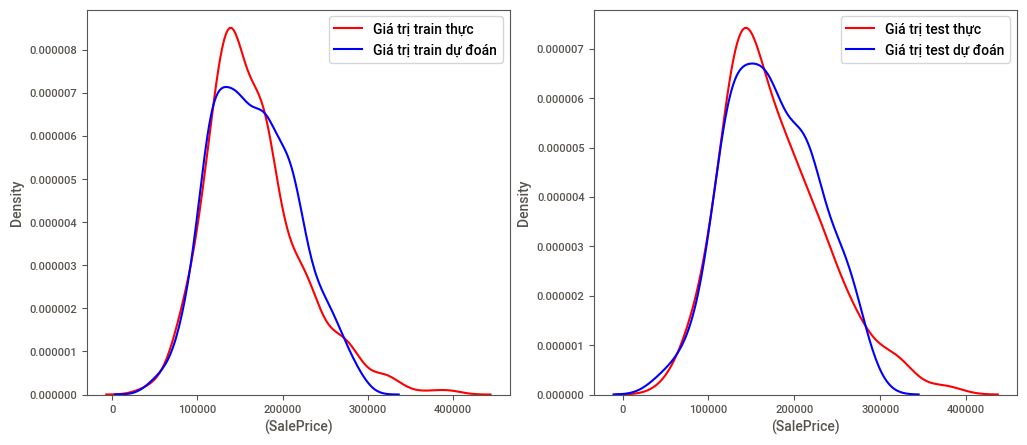

In [129]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Giá trị train thực")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Giá trị train dự đoán", ax=ax1)
plt.xlabel('(SalePrice)')
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Giá trị test thực")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Giá trị test dự đoán" , ax=ax2)
plt.xlabel('(SalePrice)')
plt.legend()
plt.show()